In [1]:
import networkx as nx
from pathlib import Path
from matplotlib import colormaps
import sys
sys.path.append(str(Path.cwd().parent))
from backpropex import Node, Edge, Layer, Network, softmax

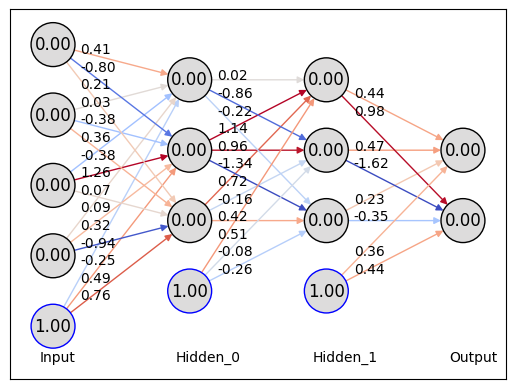

In [2]:
nn = Network(4, 3, 3, 2)
nn.draw()